In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font",family='YouYuan')

In [206]:
user_profile = pd.read_csv('./Purchase Redemption Data/user_profile_table.csv')
user_balance_data = pd.read_csv('./Purchase Redemption Data/user_balance_table.csv')
mfd_day_share_interest = pd.read_csv('./Purchase Redemption Data/mfd_day_share_interest.csv')

In [3]:
user_profile.head()

,user_id,sex,city,constellation
0,2,1,6411949,狮子座
1,12,1,6412149,摩羯座
2,22,1,6411949,双子座
3,23,1,6411949,双鱼座
4,25,1,6481949,双鱼座


# 数据探索

In [4]:
user_balance_data.head(3)

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


In [5]:
user_balance_data.isnull().sum()

user_id                      0
report_date                  0
tBalance                     0
yBalance                     0
total_purchase_amt           0
direct_purchase_amt          0
purchase_bal_amt             0
purchase_bank_amt            0
total_redeem_amt             0
consume_amt                  0
transfer_amt                 0
tftobal_amt                  0
tftocard_amt                 0
share_amt                    0
category1              2666682
category2              2666682
category3              2666682
category4              2666682
dtype: int64

In [6]:
user_balance_data.shape

(2840421, 18)

有空值得只有category1-4这四个特征，而且占比非常高，在后续处理中如果需要的话基本可以删除掉这四个特征。关键特征total_purchase_amt和total_redeem_amt没有空值

In [7]:
# 转化date到可以读取的类型
user_balance_data['report_date'] = pd.to_datetime(user_balance_data['report_date'], format='%Y%m%d')
# 按照时间排序
user_balance_data_sorted = user_balance_data.sort_values(by=['report_date'], ascending=True)

## 时间序列分析

In [8]:
user_balance_data_sorted.index = user_balance_data_sorted['report_date']

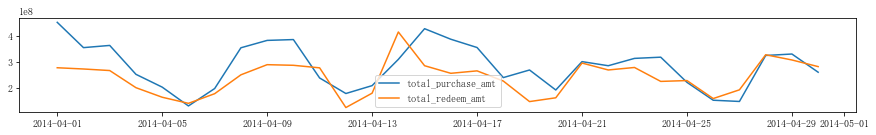

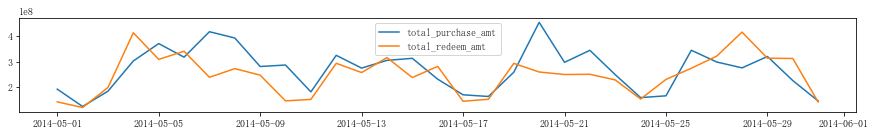

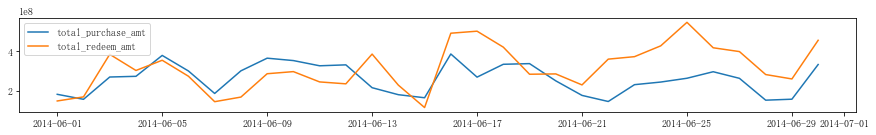

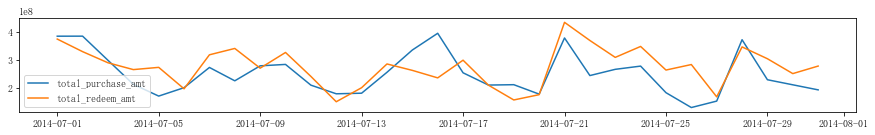

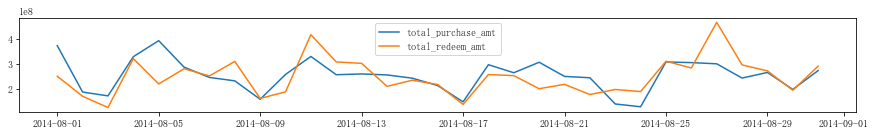

In [9]:
# 显示2014年4月-8月的流出流入总和
for month in range(1, 6):
    plt.figure(figsize=[15,10])
    plt.subplot(5, 1, month)
    plot_data = user_balance_data_sorted['2014-0%s' % (month+3)][['total_purchase_amt','total_redeem_amt']].resample('D').sum()
    plt.plot(plot_data.index, plot_data['total_purchase_amt'], label='total_purchase_amt')
    plt.plot(plot_data.index, plot_data['total_redeem_amt'], label='total_redeem_amt')
    plt.legend()
    plt.show()

1.月末时赎回高于购买（月末时更需要钱）  
2.申购与赎回看起来有关联  
3.每月有4个波峰、4个波谷  

### 观察每月每周申购赎回的规律

In [11]:
user_balance_data_sorted_daily = user_balance_data_sorted[['total_purchase_amt','total_redeem_amt']].resample('D').sum()
user_balance_data_sorted_daily['report_date'] = user_balance_data_sorted_daily.index 
user_balance_data_sorted_daily['weekday'] = user_balance_data_sorted_daily['report_date'].dt.weekday

In [12]:
user_balance_data_sorted_daily.head()

,total_purchase_amt,total_redeem_amt,report_date,weekday
report_date,,,,
2013-07-01,32488348,5525022,2013-07-01,0
2013-07-02,29037390,2554548,2013-07-02,1
2013-07-03,27270770,5953867,2013-07-03,2
2013-07-04,18321185,6410729,2013-07-04,3
2013-07-05,11648749,2763587,2013-07-05,4


In [13]:
user_balance_data_sorted_gb = user_balance_data_sorted_daily.groupby('weekday').median()
user_balance_data_sorted_gb

,total_purchase_amt,total_redeem_amt
weekday,,
0,272182847,190917629
1,265851934,221706539
2,264663201,209072753
3,245082751,190155450
4,211649838,163522548
5,153826161,123295320
6,158801540,139564084


C:\Users\kinga\Anaconda3\envs\rs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kinga\Anaconda3\envs\rs\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kinga\Anaconda3\envs\rs\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kinga\Anaconda3\envs\rs\lib\site-packages\matplotlib\backends\backend_agg.py:201: R

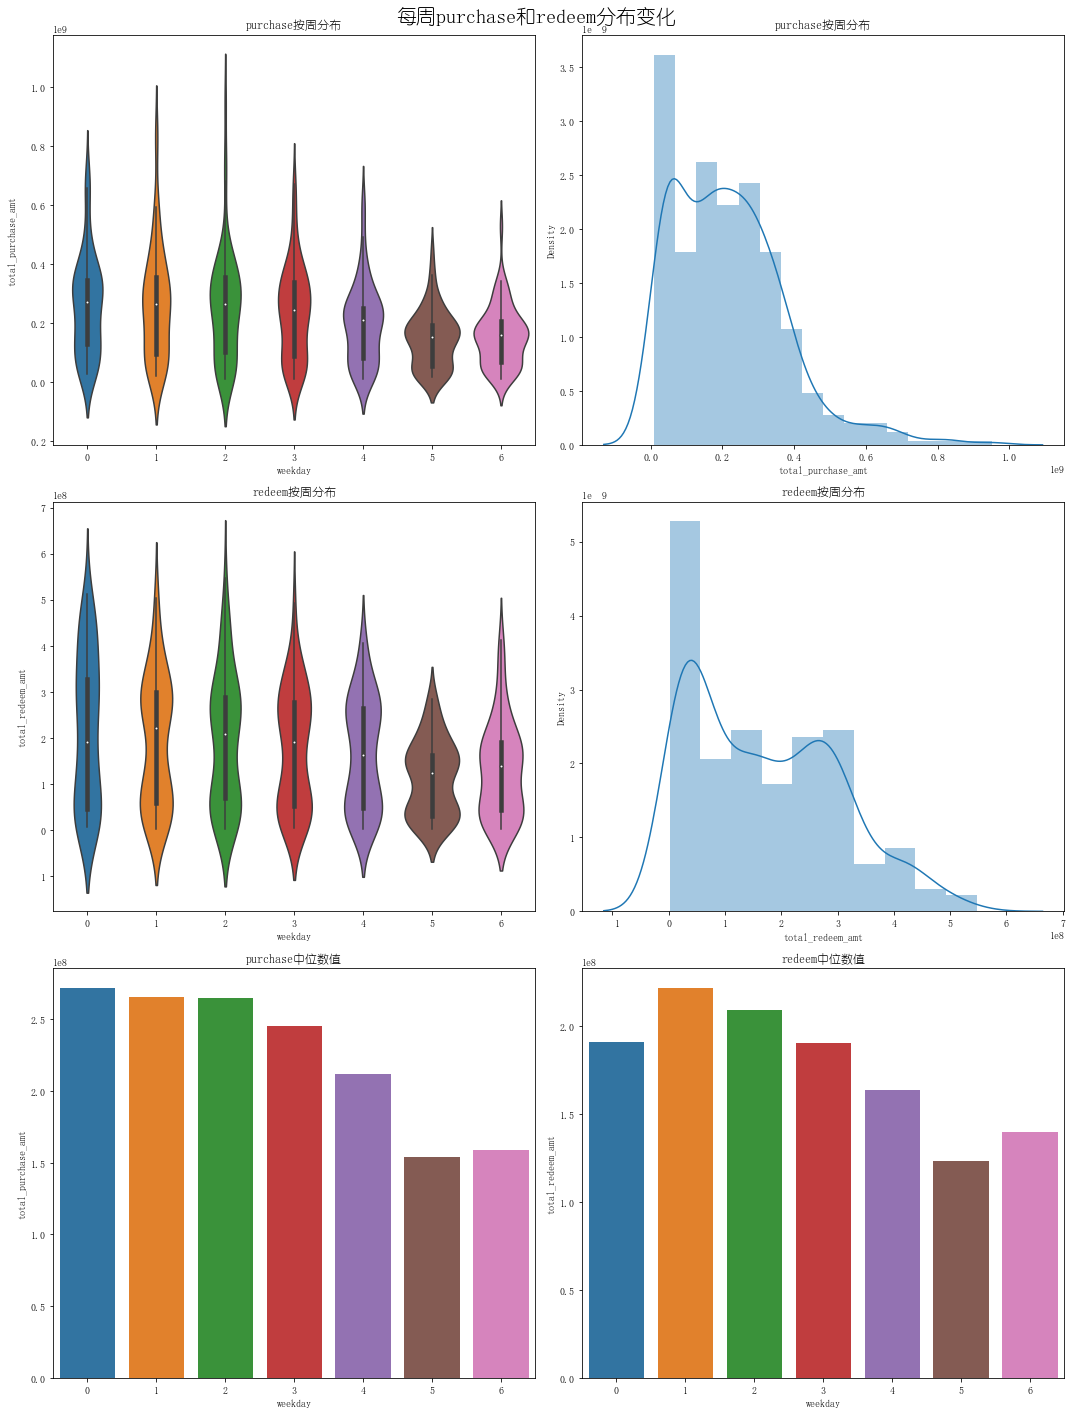

In [14]:
fig = plt.figure(figsize=[15, 20])
plt.suptitle('每周purchase和redeem分布变化', fontsize=20)
plt.subplot(321)
sns.violinplot(data=user_balance_data_sorted_daily, x='weekday',y='total_purchase_amt')
plt.title('purchase按周分布')
plt.subplot(322)
sns.distplot(user_balance_data_sorted_daily['total_purchase_amt'])
plt.title('purchase按周分布')
plt.subplot(323)
sns.violinplot(data=user_balance_data_sorted_daily, x='weekday',y='total_redeem_amt')
plt.title('redeem按周分布')
plt.subplot(324)
sns.distplot(user_balance_data_sorted_daily['total_redeem_amt'])
plt.title('redeem按周分布')
plt.subplot(325)
sns.barplot(data=user_balance_data_sorted_gb, x=user_balance_data_sorted_gb.index,y='total_purchase_amt')
plt.title('purchase中位数值')
plt.subplot(326)
sns.barplot(data=user_balance_data_sorted_gb, x=user_balance_data_sorted_gb.index,y='total_redeem_amt')
plt.title('redeem中位数值')
plt.tight_layout()

从每周分析来看：每周一到周四的交易更意愿更强（purchase和redeem）（0是周一），而周末意愿更弱

看一下总体的purchase和redeem变化走势

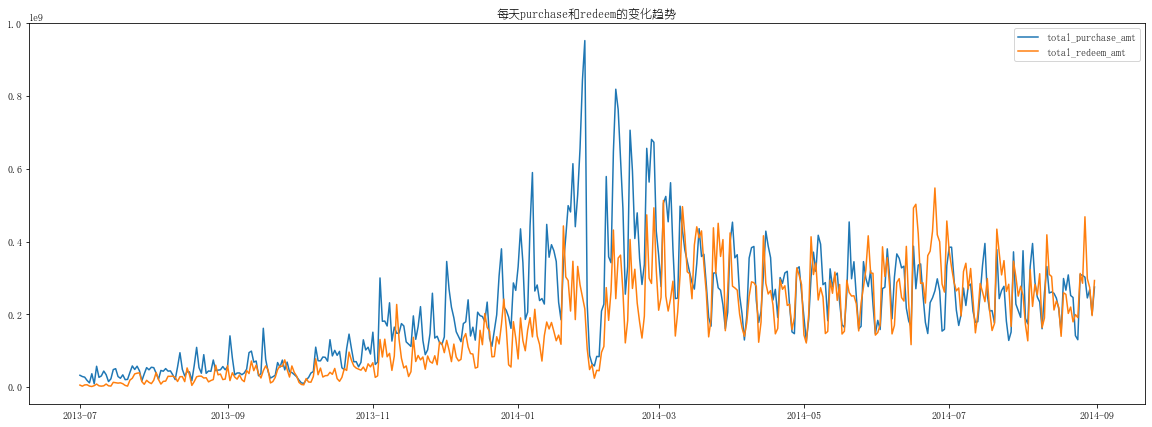

In [15]:
fig = plt.figure(figsize=[20,7])
plt.plot(user_balance_data_sorted_daily.index, user_balance_data_sorted_daily['total_purchase_amt'], label='total_purchase_amt')
plt.plot(user_balance_data_sorted_daily.index, user_balance_data_sorted_daily['total_redeem_amt'], label='total_redeem_amt')
plt.title('每天purchase和redeem的变化趋势')
plt.legend()
plt.show()

明显的在14年5月之后开始出现赎回比购买多了

**观察每周趋势**  
这里选择2014年8月的样本观察

In [194]:
plot_data = user_balance_data_sorted_daily.loc['2014-08-01':'2014-08-31']

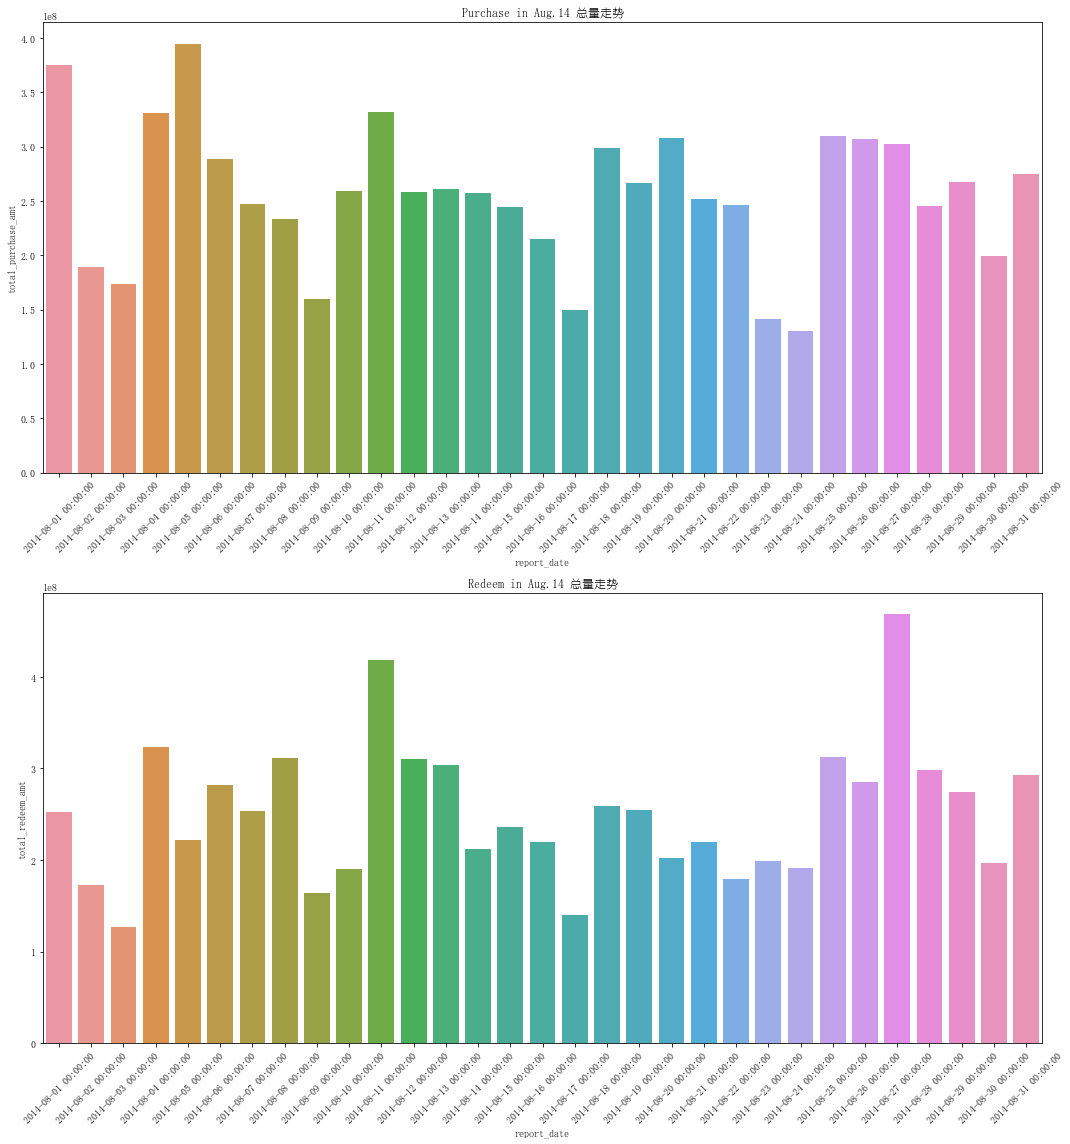

In [195]:
fig = plt.figure(figsize=[15, 16])
plt.subplot(211)
sns.barplot(data=plot_data, x=plot_data.index, y='total_purchase_amt')
plt.xticks(rotation=45)
plt.title('Purchase in Aug.14 总量走势')
plt.subplot(212)
sns.barplot(data=plot_data, x=plot_data.index, y='total_redeem_amt')
plt.xticks(rotation=45)
plt.title('Redeem in Aug.14 总量走势')
plt.tight_layout()

以上图可以推断出：
- 每周开始倾向购买，每周中期倾向于赎回
- 周末不倾向交易
- 赎回波动性比购买大

### 观察分析节假日影响  
因为节假日是时间序列中比较重要的影响因子，所以接下来在节假日中和节假日前后分开分析purchase和redeem的影响。  

#### 节假日期间  
选了这几个假期来进行:  
**法定假日：**  
春节 (2014.01.31 - 2014.02.06)  
清明节 (2014.4.5 - 2014.4.7)  
劳动节 (2014.5.1 - 2014.5.3)  
端午节 (2014.6.2)  
国庆节 （2013.10.01 - 2013.10.07）  
中秋节 (2013.9.18 - 2013.9.20)   
**商家制定节日：**  
618购物节 （6.17-6.19）   
1111购物节 （2013.11.10-2013-11.11）（此项经过柱状图可以观察11月10号的赎回量巨大，应该是为了11号购物使用）  
与平时均值对比一下

In [110]:
# 计算阳历节日的purchase和redeem均值
def cal_ave_pur_red(data, start_date, end_date):
    interval = data.report_date[-1].year - data.report_date[0].year
    year_list = [data.report_date[0].year + i for i in range(interval + 1)]
    df_demo = pd.DataFrame(columns=['total_purchase_amt', 'total_redeem_amt'])
    for year in year_list:
        s_date = ('%s-' % year) + start_date
        e_date = ('%s-' % year) + end_date
        if pd.to_datetime(s_date) <= data.report_date[-1]:
            df_demo = pd.concat([df_demo, data[s_date : e_date][['total_purchase_amt', 'total_redeem_amt']]])
    return df_demo.mean()  

In [155]:
# 这里因为上述节日（包括阴历节日都只单独出现在2013年或者2014年，所以上述方程可用）
fes = ['Spring Festerval', 'QingMing', 'Labour', 'DuanWu', 'GuoQing', 'MidAutumn', '618']
interval = [['01-31', '02-06'], ['04-05', '04-07'],['05-01','05-03'], ['06-01','06-02',], ['09-18','09-20'], ['10-01','10-07'], ['06-17','06-18']]
fes_stat = pd.DataFrame(columns=['total_purchase_amt', 'total_redeem_amt'])
for i in range(7):
    res = cal_ave_pur_red(user_balance_data_sorted_daily, interval[i][0], interval[i][1])
    fes_stat.loc[fes[i]] = res
fes_stat

,total_purchase_amt,total_redeem_amt
Spring Festerval,1.163446e+08,6.173353e+07
QingMing,1.762500e+08,1.599143e+08
Labour,1.678253e+08,1.547176e+08
DuanWu,1.708546e+08,1.601194e+08
GuoQing,3.202347e+07,2.460333e+07
MidAutumn,2.408602e+07,1.514402e+07
618,3.028067e+08,4.622402e+08


In [ ]:
# 当需要除去节日计算均值
interval_t = [['2014-04-05', '2014-04-06'],['2014-05-01','2014-05-03'], ['2014-06-01','2014-06-02'], 
              ['2013-09-18','2013-09-20'], ['2014-06-17','2014-06-19'], ['2013-10-01','2013-10-07'], 
              ['2014-01-31', '2014-02-06']]
test_df = user_balance_data_sorted_daily.copy(deep=True)
for i in range(len(interval_t)):
    test_df = test_df[(test_df.index < interval_t[i][0]) | (test_df.index > interval_t[i][1])]
test_df = user_balance_data_sorted_daily.copy(deep=True)[['total_purchase_amt', 'total_redeem_amt']]
fes_stat.loc['mean'] = test_df.mean()

In [162]:
# 不除去节日计算均值
test_df = user_balance_data_sorted_daily.copy(deep=True)[['total_purchase_amt', 'total_redeem_amt']]
fes_stat.loc['mean'] = test_df.mean()

In [163]:
fes_stat

,total_purchase_amt,total_redeem_amt
Spring Festerval,1.163446e+08,6.173353e+07
QingMing,1.762500e+08,1.599143e+08
Labour,1.678253e+08,1.547176e+08
DuanWu,1.708546e+08,1.601194e+08
GuoQing,3.202347e+07,2.460333e+07
MidAutumn,2.408602e+07,1.514402e+07
618,3.028067e+08,4.622402e+08
mean,2.168409e+08,1.703005e+08


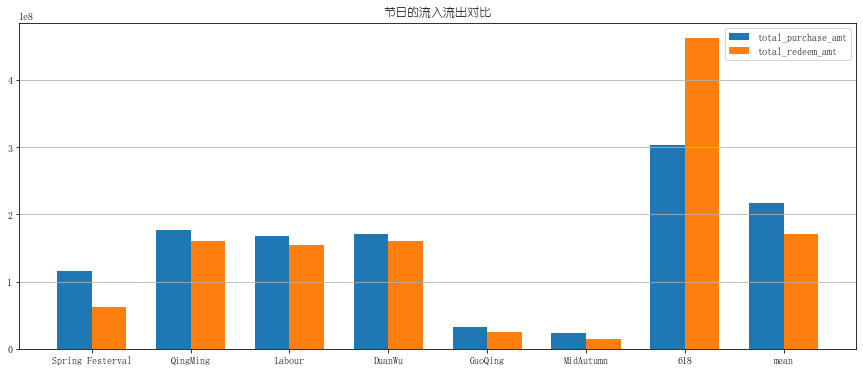

In [166]:
plt.figure(figsize=[15,6])
index = np.arange(8)
bar_width = 0.35
plt.bar(x=index, height=fes_stat['total_purchase_amt'], width=bar_width, label='total_purchase_amt')
plt.bar(x=index+bar_width, height=fes_stat['total_redeem_amt'], width=bar_width, label='total_redeem_amt')
plt.xticks(index + bar_width/2, fes_stat.index)
plt.title('节日的流入流出对比')
plt.grid(axis='y')
plt.legend()

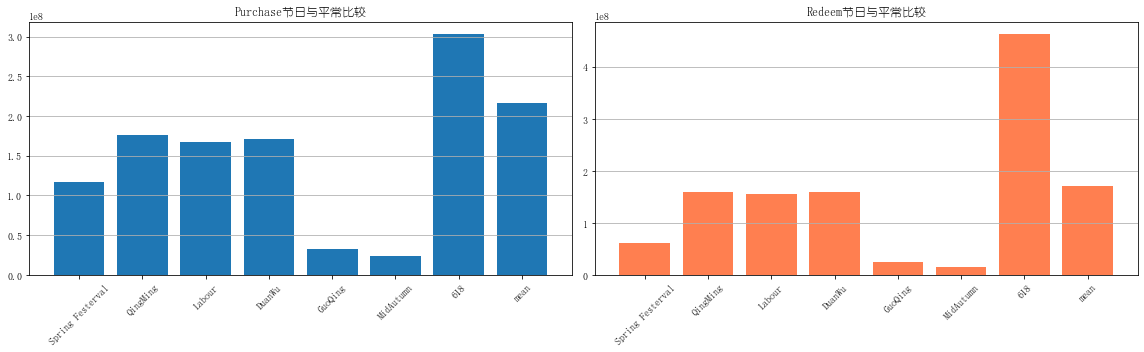

In [177]:
fig = plt.figure(figsize=[16, 5])
plt.subplot(121)
plt.bar(x=fes_stat.index, height=fes_stat['total_purchase_amt'])
plt.xticks(rotation=45)
plt.title('Purchase节日与平常比较')
plt.grid(axis='y')
plt.subplot(122)
plt.bar(x=fes_stat.index, height=fes_stat['total_redeem_amt'], color='coral')
plt.xticks(rotation=45)
plt.title('Redeem节日与平常比较')
plt.grid(axis='y')
plt.tight_layout()

根据以上观察可以推断的是：
1. 法定节假日的purchase要低于平均，redeem轻微低于平均。
2. 购物节的purchase和redeem更明显超过平时，尤其redeem(毕竟购买要流出资金)

#### 节假日前后  
上面分析了节假日和非节假日的差别，还可以观察一下节假日前后的走势变化

In [192]:
fes_plot = user_balance_data_sorted_daily.copy(deep=True)
fes_p = ['QingMing', 'Labour', 'DuanWu', 'MidAutumn', '618', 'GuoQing', 'Spring Festerval']
interval_p = [['2014-04-01', '2014-04-11'],['2014-04-26','2014-05-08'], ['2014-05-26','2014-06-07'], 
              ['2013-09-13','2013-09-25'], ['2014-06-12','2014-06-24'], ['2013-09-26','2013-10-12'], 
              ['2014-01-25', '2014-02-10']]

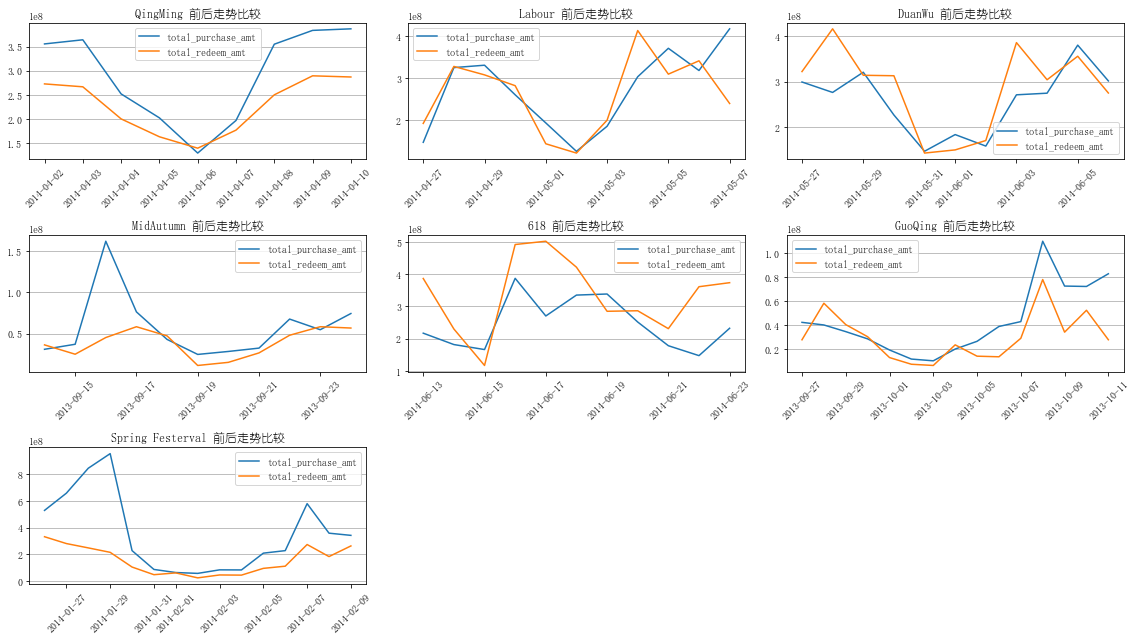

In [193]:
fig = plt.figure(figsize=[16, 9])
for i in range(len(fes_p)): 
    data_p = fes_plot[(fes_plot.index > interval_p[i][0]) & (fes_plot.index < interval_p[i][1])]
    plt.subplot(3,3,i + 1)
    plt.plot(data_p.index, data_p['total_purchase_amt'], label='total_purchase_amt')
    plt.plot(data_p.index, data_p['total_redeem_amt'], label='total_redeem_amt')
    plt.legend()
    plt.xticks(rotation=45)
    plt.title('%s 前后走势比较' % fes_p[i])
    plt.grid(axis='y')
plt.tight_layout()

结论：法定节假日节前交易量下降，节后交易量上升，购物节相反。

### 分析用户交易记录表其他特征的关系
#### 查看与user_balance_data中其他特征之间的关系

In [207]:
user_balance_data.columns

Index(['user_id', 'report_date', 'tBalance', 'yBalance', 'total_purchase_amt',
       'direct_purchase_amt', 'purchase_bal_amt', 'purchase_bank_amt',
       'total_redeem_amt', 'consume_amt', 'transfer_amt', 'tftobal_amt',
       'tftocard_amt', 'share_amt', 'category1', 'category2', 'category3',
       'category4'],
      dtype='object')

In [198]:
mfd_day_share_interest.columns

Index(['mfd_date', 'mfd_daily_yield', 'mfd_7daily_yield'], dtype='object')

In [199]:
user_profile.columns

Index(['user_id', 'sex', 'city', 'constellation'], dtype='object')

In [208]:
user_balance_data_clean = user_balance_data.drop(['category1','category2','category3','category4'], axis=1)
user_balance_data_clean.columns

Index(['user_id', 'report_date', 'tBalance', 'yBalance', 'total_purchase_amt',
       'direct_purchase_amt', 'purchase_bal_amt', 'purchase_bank_amt',
       'total_redeem_amt', 'consume_amt', 'transfer_amt', 'tftobal_amt',
       'tftocard_amt', 'share_amt'],
      dtype='object')

<AxesSubplot:>

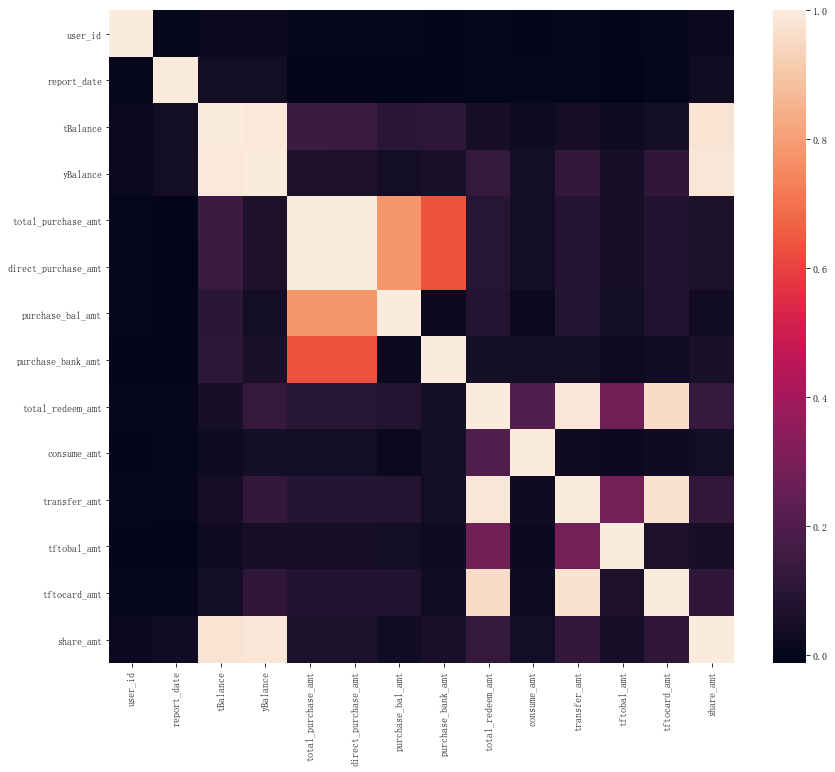

In [215]:
pearson_corr = user_balance_data_clean.corr()
plt.figure(figsize=[14,12])
sns.heatmap(data=pearson_corr)

#### 查看与银行利率关系

In [226]:
mfd_bank_shibor = pd.read_csv('./Purchase Redemption Data/mfd_bank_shibor.csv')

In [227]:
# 转化date到可以读取的类型
mfd_bank_shibor['mfd_date'] = pd.to_datetime(mfd_bank_shibor['mfd_date'], format='%Y%m%d')
# 按照时间排序
mfd_bank_shibor_sorted = mfd_bank_shibor.sort_values(by=['mfd_date'], ascending=True)

In [230]:
mfd_bank_shibor_sorted.index = mfd_bank_shibor_sorted['mfd_date']
mfd_bank_shibor_sorted.drop(['mfd_date'], axis=1, inplace=True)

In [232]:
mfd_bank_shibor_sorted.head()

,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y
mfd_date,,,,,,,,
2013-07-01,4.456,5.423,6.040,6.8800,5.295,4.2390,4.2820,4.4125
2013-07-02,3.786,4.750,5.074,5.8000,5.211,4.2344,4.2808,4.4070
2013-07-03,3.400,4.242,4.658,5.2000,5.148,4.2300,4.2796,4.4022
2013-07-04,3.348,3.938,4.464,5.1020,5.029,4.2287,4.2776,4.4000
2013-07-05,3.380,3.816,4.295,4.7885,4.939,4.2273,4.2749,4.4000


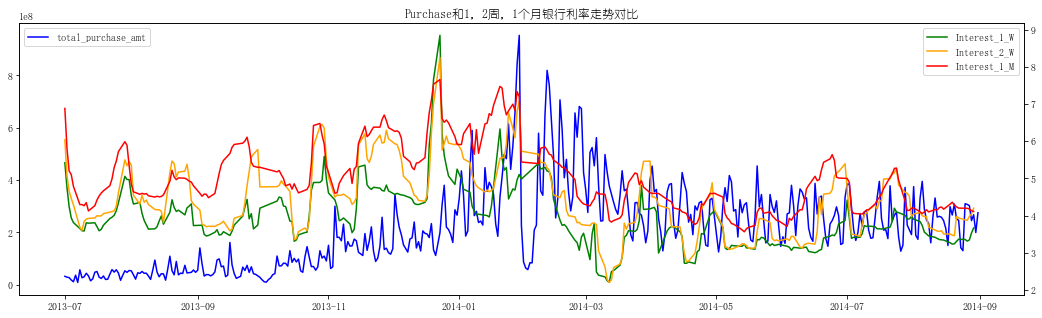

In [257]:
fig, ax1 = plt.subplots(figsize=[18,5])
ax2 = ax1.twinx()
ax1.plot(user_balance_data_sorted_daily.index, user_balance_data_sorted_daily['total_purchase_amt'], c='blue', label='total_purchase_amt')
ax1.legend(loc=2)
plt.title('Purchase和1，2周，1个月银行利率走势对比')
ax2.plot(mfd_bank_shibor_sorted.index, mfd_bank_shibor_sorted['Interest_1_W'], c='green', label='Interest_1_W')
ax2.plot(mfd_bank_shibor_sorted.index, mfd_bank_shibor_sorted['Interest_2_W'], c='orange', label='Interest_2_W')
ax2.plot(mfd_bank_shibor_sorted.index, mfd_bank_shibor_sorted['Interest_1_M'], c='red', label='Interest_1_M')
ax2.legend(loc=1)
plt.show()

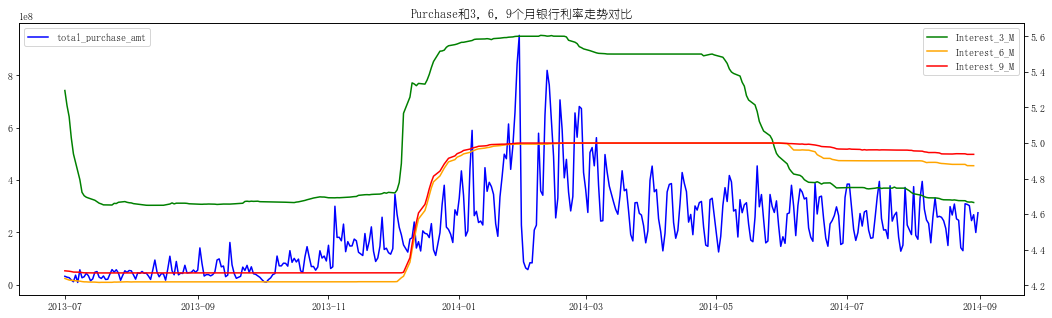

In [256]:
fig, ax1 = plt.subplots(figsize=[18,5])
ax2 = ax1.twinx()
ax1.plot(user_balance_data_sorted_daily.index, user_balance_data_sorted_daily['total_purchase_amt'], c='blue', label='total_purchase_amt')
ax1.legend(loc=2)
plt.title('Purchase和3，6，9个月银行利率走势对比')
ax2.plot(mfd_bank_shibor_sorted.index, mfd_bank_shibor_sorted['Interest_3_M'], c='green', label='Interest_3_M')
ax2.plot(mfd_bank_shibor_sorted.index, mfd_bank_shibor_sorted['Interest_6_M'], c='orange', label='Interest_6_M')
ax2.plot(mfd_bank_shibor_sorted.index, mfd_bank_shibor_sorted['Interest_9_M'], c='red', label='Interest_9_M')
ax2.legend(loc=1)
plt.show()

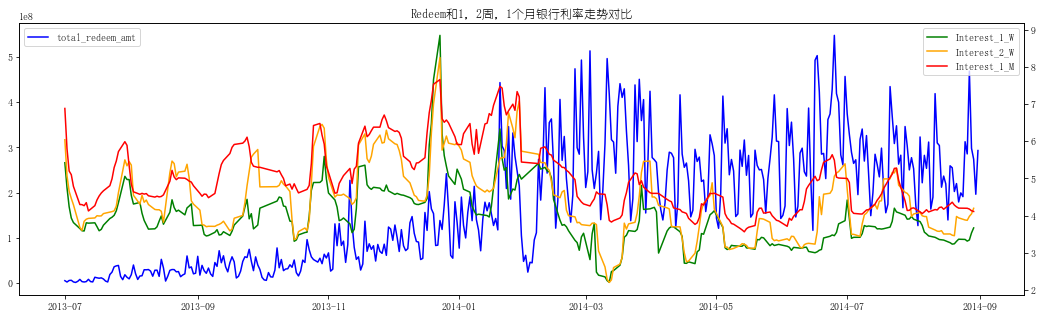

In [258]:
fig, ax1 = plt.subplots(figsize=[18,5])
ax2 = ax1.twinx()
ax1.plot(user_balance_data_sorted_daily.index, user_balance_data_sorted_daily['total_redeem_amt'], c='blue', label='total_redeem_amt')
ax1.legend(loc=2)
plt.title('Redeem和1，2周，1个月银行利率走势对比')
ax2.plot(mfd_bank_shibor_sorted.index, mfd_bank_shibor_sorted['Interest_1_W'], c='green', label='Interest_1_W')
ax2.plot(mfd_bank_shibor_sorted.index, mfd_bank_shibor_sorted['Interest_2_W'], c='orange', label='Interest_2_W')
ax2.plot(mfd_bank_shibor_sorted.index, mfd_bank_shibor_sorted['Interest_1_M'], c='red', label='Interest_1_M')
ax2.legend(loc=1)
plt.show()

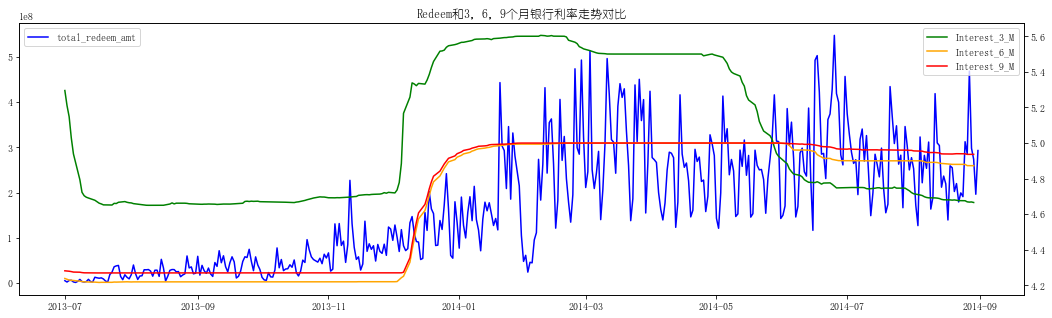

In [259]:
fig, ax1 = plt.subplots(figsize=[18,5])
ax2 = ax1.twinx()
ax1.plot(user_balance_data_sorted_daily.index, user_balance_data_sorted_daily['total_redeem_amt'], c='blue', label='total_redeem_amt')
ax1.legend(loc=2)
plt.title('Redeem和3，6，9个月银行利率走势对比')
ax2.plot(mfd_bank_shibor_sorted.index, mfd_bank_shibor_sorted['Interest_3_M'], c='green', label='Interest_3_M')
ax2.plot(mfd_bank_shibor_sorted.index, mfd_bank_shibor_sorted['Interest_6_M'], c='orange', label='Interest_6_M')
ax2.plot(mfd_bank_shibor_sorted.index, mfd_bank_shibor_sorted['Interest_9_M'], c='red', label='Interest_9_M')
ax2.legend(loc=1)
plt.show()

In [260]:
mfd_day_share_interest.head()

,mfd_date,mfd_daily_yield,mfd_7daily_yield
0,20130701,1.5787,6.307
1,20130702,1.5461,6.174
2,20130703,1.4670,6.034
3,20130704,1.4223,5.903
4,20130705,1.3845,5.739


In [261]:
# 转化date到可以读取的类型
mfd_day_share_interest['mfd_date'] = pd.to_datetime(mfd_day_share_interest['mfd_date'], format='%Y%m%d')
# 按照时间排序
mfd_day_share_interest_sorted = mfd_day_share_interest.sort_values(by=['mfd_date'], ascending=True)
mfd_day_share_interest_sorted.index = mfd_day_share_interest_sorted['mfd_date']
mfd_day_share_interest_sorted.drop(['mfd_date'], axis=1, inplace=True)
mfd_day_share_interest_sorted.head()

,mfd_daily_yield,mfd_7daily_yield
mfd_date,,
2013-07-01,1.5787,6.307
2013-07-02,1.5461,6.174
2013-07-03,1.4670,6.034
2013-07-04,1.4223,5.903
2013-07-05,1.3845,5.739


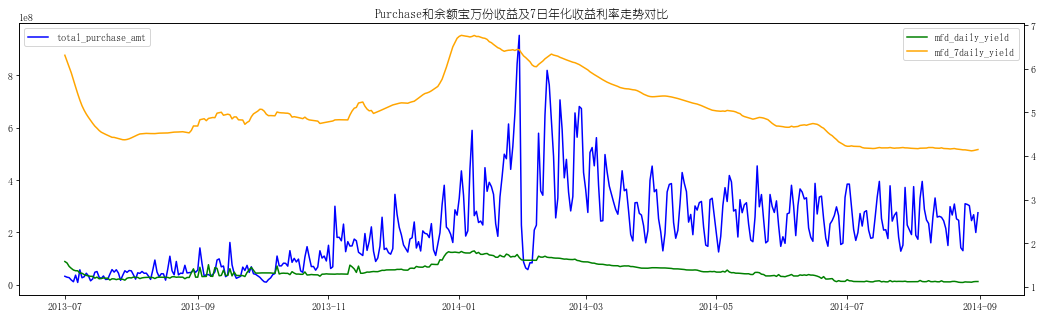

In [264]:
fig, ax1 = plt.subplots(figsize=[18,5])
ax2 = ax1.twinx()
ax1.plot(user_balance_data_sorted_daily.index, user_balance_data_sorted_daily['total_purchase_amt'], c='blue', label='total_purchase_amt')
ax1.legend(loc=2)
plt.title('Purchase和余额宝万份收益及7日年化收益利率走势对比')
ax2.plot(mfd_day_share_interest_sorted.index, mfd_day_share_interest_sorted['mfd_daily_yield'], c='green', label='mfd_daily_yield')
ax2.plot(mfd_day_share_interest_sorted.index, mfd_day_share_interest_sorted['mfd_7daily_yield'], c='orange', label='mfd_7daily_yield')
ax2.legend(loc=1)
plt.show()

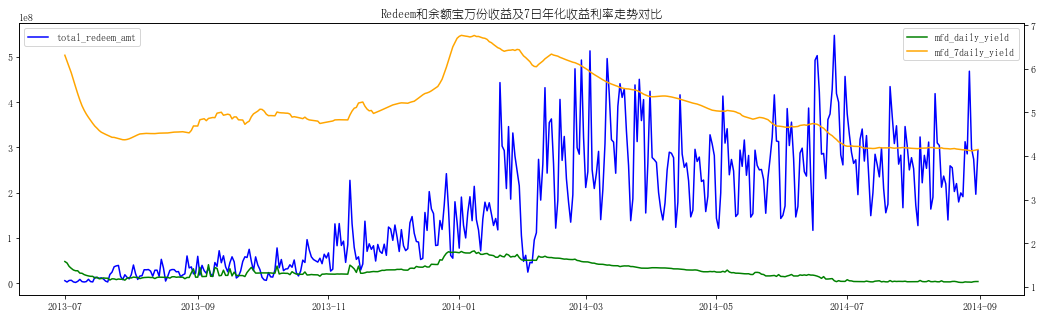

In [265]:
fig, ax1 = plt.subplots(figsize=[18,5])
ax2 = ax1.twinx()
ax1.plot(user_balance_data_sorted_daily.index, user_balance_data_sorted_daily['total_redeem_amt'], c='blue', label='total_redeem_amt')
ax1.legend(loc=2)
plt.title('Redeem和余额宝万份收益及7日年化收益利率走势对比')
ax2.plot(mfd_day_share_interest_sorted.index, mfd_day_share_interest_sorted['mfd_daily_yield'], c='green', label='mfd_daily_yield')
ax2.plot(mfd_day_share_interest_sorted.index, mfd_day_share_interest_sorted['mfd_7daily_yield'], c='orange', label='mfd_7daily_yield')
ax2.legend(loc=1)
plt.show()

In [267]:
mfd_day_share_interest_sorted.shape

(427, 2)

In [269]:
# 查看一下余额宝利率和purchase以及redeem之间的相关性 
users_mfd_day_data = pd.concat([user_balance_data_sorted_daily[['total_purchase_amt','total_redeem_amt']], mfd_day_share_interest_sorted], 
                               axis=1)

<AxesSubplot:>

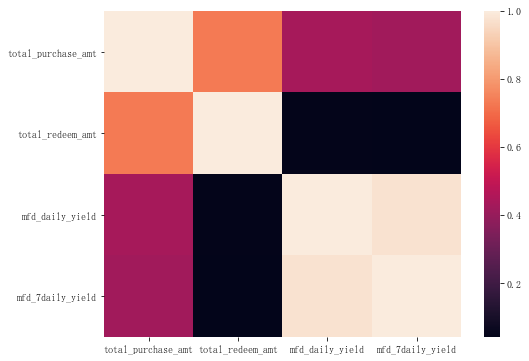

In [276]:
pearson_corr_mfd = users_mfd_day_data.corr()
plt.figure(figsize=[8,6])
sns.heatmap(data=pearson_corr_mfd)

In [277]:
pearson_corr_mfd

,total_purchase_amt,total_redeem_amt,mfd_daily_yield,mfd_7daily_yield
total_purchase_amt,1.000000,0.732118,0.435140,0.426814
total_redeem_amt,0.732118,1.000000,0.047801,0.041836
mfd_daily_yield,0.435140,0.047801,1.000000,0.976506
mfd_7daily_yield,0.426814,0.041836,0.976506,1.000000


从走势图以及皮尔森相关系数来看，支付宝的利率跟redeem没什么相关性，但是跟purchase相关性很高。

结论： 
- share（今日收益）的影响更多体现在purchase。  
- bank rate的影响更多体现在redeem。  
- share rate（收益率）为短期影响。  
- 银行利率为长期影响。

#### 查看与性别关系

In [293]:
# 合并两个表
user_balance_data_sorted_profile = pd.merge(user_balance_data_sorted, user_profile, on='user_id', how='left')

In [312]:
tmp_user_profile = user_balance_data_sorted_profile.groupby(['report_date', 'sex'])['total_purchase_amt','total_redeem_amt'].sum().reset_index()

<ipython-input-312-ade16c5627ec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp_user_profile = user_balance_data_sorted_profile.groupby(['report_date', 'sex'])['total_purchase_amt','total_redeem_amt'].sum().reset_index()


In [335]:
sex_list = tmp_user_profile['sex'].unique()
tmp_sex_0 = tmp_user_profile[tmp_user_profile['sex'] == sex_list[0]]
tmp_sex_1 = tmp_user_profile[tmp_user_profile['sex'] == sex_list[1]]
tmp_sex_0.index = tmp_sex_0['report_date']
tmp_sex_1.index = tmp_sex_1['report_date']

In [336]:
tmp_sex_0 = tmp_sex_0.loc['2014-04-01':'2014-08-31']
tmp_sex_1 = tmp_sex_1.loc['2014-04-01':'2014-08-31']

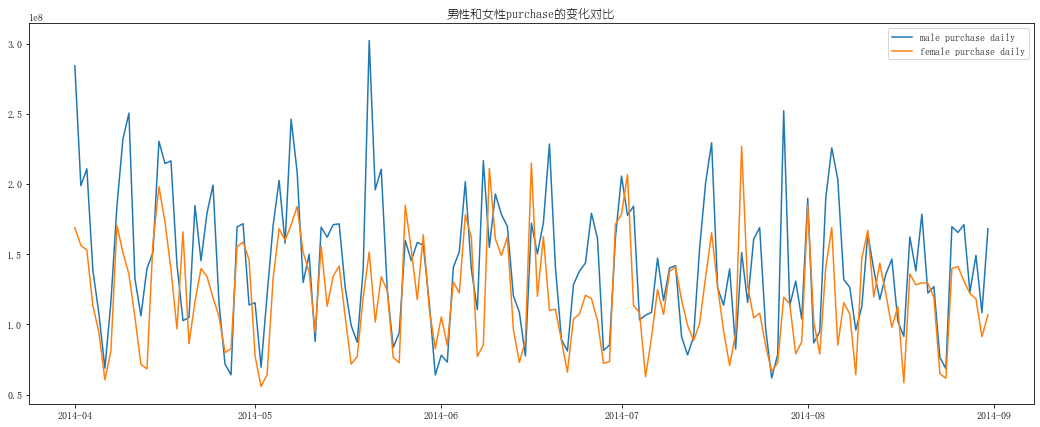

In [337]:
fig = plt.figure(figsize=[18,7])
plt.plot(tmp_sex_1['report_date'], tmp_sex_1['total_purchase_amt'], label='male purchase daily')
plt.plot(tmp_sex_0['report_date'], tmp_sex_0['total_purchase_amt'], label='female purchase daily')
plt.title('男性和女性purchase的变化对比')
plt.legend()
plt.show()

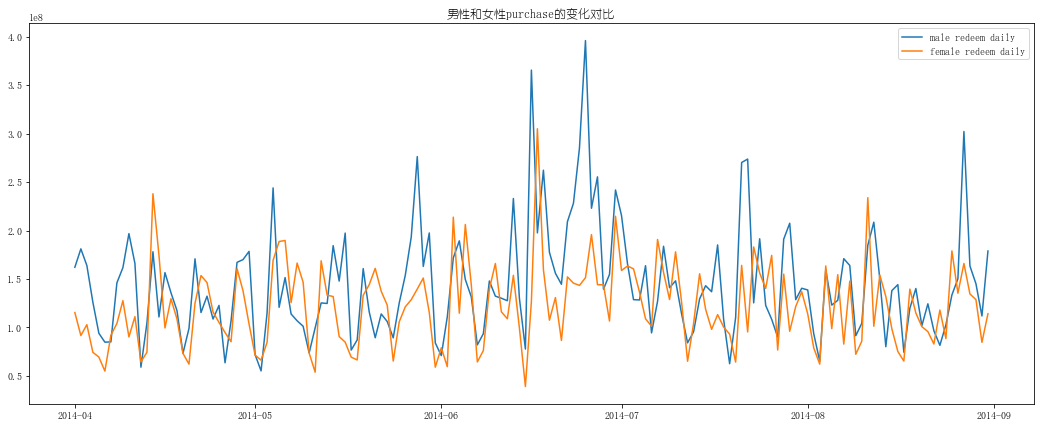

In [338]:
fig = plt.figure(figsize=[18,7])
plt.plot(tmp_sex_1['report_date'], tmp_sex_1['total_redeem_amt'], label='male redeem daily')
plt.plot(tmp_sex_0['report_date'], tmp_sex_0['total_redeem_amt'], label='female redeem daily')
plt.title('男性和女性purchase的变化对比')
plt.legend()
plt.show()

<AxesSubplot:>

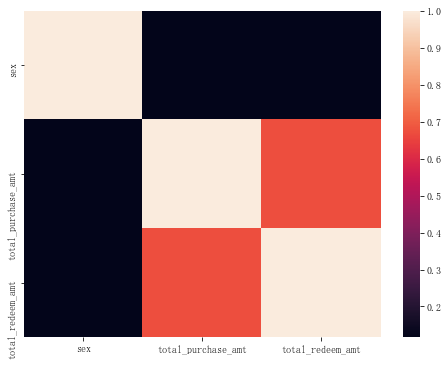

In [320]:
pearson_corr_sex = tmp_user_profile.corr()
plt.figure(figsize=[8,6])
sns.heatmap(data=pearson_corr_sex)

In [321]:
pearson_corr_sex

,sex,total_purchase_amt,total_redeem_amt
sex,1.000000,0.116796,0.120176
total_purchase_amt,0.116796,1.000000,0.672453
total_redeem_amt,0.120176,0.672453,1.000000


分析：从走势图和pearson图上观察看性别有一定规律，但是还不是特别明显，可选择作为特征构成。

#### 观察与城市的关联度

In [322]:
user_profile.city.unique()

array([6411949, 6412149, 6481949, 6281949, 6081949, 6581949, 6301949],
      dtype=int64)

In [325]:
tmp_user_city = user_balance_data_sorted_profile.groupby(['report_date', 'city'])['total_purchase_amt','total_redeem_amt'].sum().reset_index()
tmp_user_city

<ipython-input-325-17392040378a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp_user_city = user_balance_data_sorted_profile.groupby(['report_date', 'city'])['total_purchase_amt','total_redeem_amt'].sum().reset_index()


,report_date,city,total_purchase_amt,total_redeem_amt
0,2013-07-01,6081949,1864920,2086337
1,2013-07-01,6281949,7133710,1402749
2,2013-07-01,6301949,8496722,157397
3,2013-07-01,6411949,9549511,17150
4,2013-07-01,6412149,4425196,1609493
...,...,...,...,...
2984,2014-08-31,6301949,22046818,34990342
2985,2014-08-31,6411949,18875615,30479986
2986,2014-08-31,6412149,12936882,38896654
2987,2014-08-31,6481949,8985670,11158512


Text(0.5, 1.0, 'redeem与city')

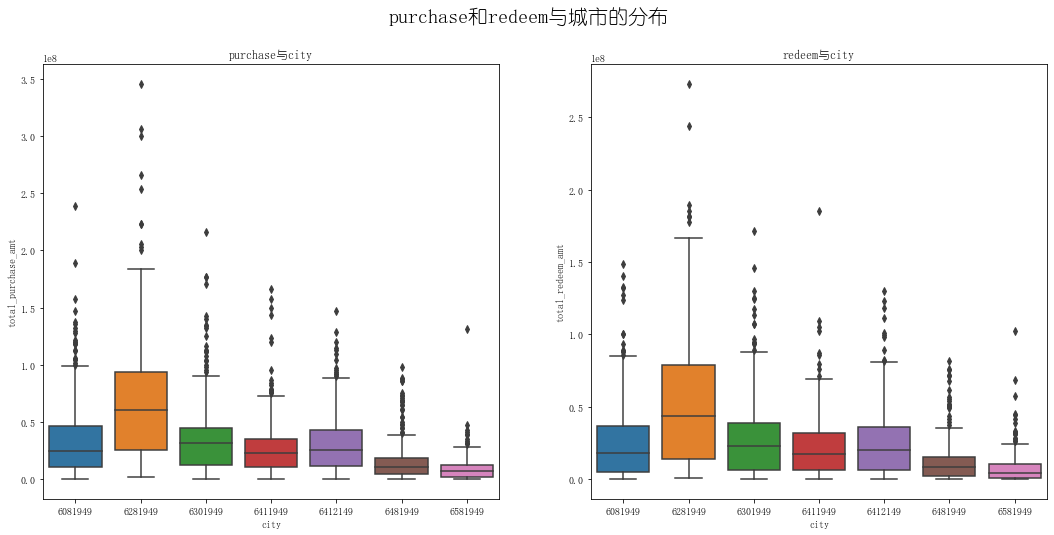

In [330]:
fig = plt.figure(figsize=[18, 8])
plt.suptitle('purchase和redeem与城市的分布', fontsize=20)
plt.subplot(121)
sns.boxplot(data=tmp_user_city, x='city',y='total_purchase_amt')
plt.title('purchase与city')
plt.subplot(122)
sns.boxplot(data=tmp_user_city, x='city',y='total_redeem_amt')
plt.title('redeem与city')

分析：城市与purchase与redeem也有关系，可作为特征构成

**结论**：  
根据以上数据探索，可以作为构建模型的参考特征有（包括原有特征和构造特征）：  
- 性别(具体到单个人身上才用)
- 城市(具体到单个人身上才用)
- 法定节假日
- 星期
- 周末
- 与本周（周一）开始的距离
- 与本周（周日）结束的距离
- 与法定节假日中心的距离
- 与本月开始的距离
- 与本月结束的距离
- 上个月同一周的最大，最小，均值（pruchase和redeem）
- 上个月的最后一天的值（purchase和redeem）

# 特征工程
## 稀疏特征构建
这部分主要是构建bool型的特征

### 构建星期相关特征
- 周几
- 是否周末

In [20]:
user_balance_data_sorted_daily['weekday'] = user_balance_data_sorted_daily['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                                                                                           3: 'Thursday', 4: 'Friday', 5: 'Saturday', 
                                                                                           6: 'Sunday'})

In [340]:
user_balance_data_sorted_daily

,total_purchase_amt,total_redeem_amt,report_date,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
report_date,,,,,,,,,,
2013-07-01,32488348,5525022,2013-07-01,0,1,0,0,0,0,0
2013-07-02,29037390,2554548,2013-07-02,0,0,0,0,0,1,0
2013-07-03,27270770,5953867,2013-07-03,0,0,0,0,0,0,1
2013-07-04,18321185,6410729,2013-07-04,0,0,0,0,1,0,0
2013-07-05,11648749,2763587,2013-07-05,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2014-08-27,302194801,468164147,2014-08-27,0,0,0,0,0,0,1
2014-08-28,245082751,297893861,2014-08-28,0,0,0,0,1,0,0
2014-08-29,267554713,273756380,2014-08-29,1,0,0,0,0,0,0
